# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
! pip install matplotlib
! pip install pandas
! pip install requests
! pip install scipy


In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


651

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# Save config information
url = "http://api.openweathermap.org/data/2.5/weather?"
cities_data = []
units = "imperial"

# Build Cities List
for x in range(len(cities)):
    query_url = f"{url}appid={weather_api_key}&units={units}"
    weather_response = requests.get(f'{query_url}&q={cities[x]}').json()
    
    try:
        city_lat = weather_response['coord']['lat']
        city_lon = weather_response['coord']['lon']
        city_humidity = weather_response['main']['humidity']
        city_temp = weather_response['main']['temp']
        city_country = weather_response['sys']['country']
        city_name = weather_response['name']
        city_windiness = weather_response['wind']['speed']
        city_clouds = weather_response['clouds']['all']

        cities_data.append({'City Name' : city_name,
                            'Country Code' : city_country,
                            'Latitude': city_lat, 
                            'Longitude': city_lon,
                            'Temperature' : city_temp, 
                            'Humidity' : city_humidity,
                            'Wind Speed' : city_windiness,
                            'Cloudiness' : city_clouds
                           })
        
        print(f"Processing record {x + 1} of {len(cities)} | {cities[x]}")
        
    except KeyError:
        print(f"Processing record {x +1} of {len(cities)} | City not Found! {cities[x]}")
  
    

Processing record 1 of 651 | ribeira grande
Processing record 2 of 651 | sorland
Processing record 3 of 651 | saldanha
Processing record 4 of 651 | pisco
Processing record 5 of 651 | hobart
Processing record 6 of 651 | new norfolk
Processing record 7 of 651 | narsaq
Processing record 8 of 651 | chicama
Processing record 9 of 651 | ust-karsk
Processing record 10 of 651 | jamestown
Processing record 11 of 651 | mataura
Processing record 12 of 651 | olafsvik
Processing record 13 of 651 | niono
Processing record 14 of 651 | kudahuvadhoo
Processing record 15 of 651 | vaini
Processing record 16 of 651 | City not Found! illoqqortoormiut
Processing record 17 of 651 | esperance
Processing record 18 of 651 | johi
Processing record 19 of 651 | rikitea
Processing record 20 of 651 | luang prabang
Processing record 21 of 651 | kapaa
Processing record 22 of 651 | dikson
Processing record 23 of 651 | fairbanks
Processing record 24 of 651 | punta arenas
Processing record 25 of 651 | ampanihy
Processing

Processing record 199 of 651 | kungurtug
Processing record 200 of 651 | sambava
Processing record 201 of 651 | longyearbyen
Processing record 202 of 651 | oktyabrskoye
Processing record 203 of 651 | san borja
Processing record 204 of 651 | City not Found! barentsburg
Processing record 205 of 651 | ust-barguzin
Processing record 206 of 651 | tombouctou
Processing record 207 of 651 | shelburne
Processing record 208 of 651 | City not Found! ondorhaan
Processing record 209 of 651 | singapore
Processing record 210 of 651 | thoen
Processing record 211 of 651 | kodiak
Processing record 212 of 651 | oum hadjer
Processing record 213 of 651 | bethal
Processing record 214 of 651 | rokytne
Processing record 215 of 651 | la asuncion
Processing record 216 of 651 | lethem
Processing record 217 of 651 | kutum
Processing record 218 of 651 | biak
Processing record 219 of 651 | nacala
Processing record 220 of 651 | aksu
Processing record 221 of 651 | archidona
Processing record 222 of 651 | ostrovnoy
Pro

Processing record 397 of 651 | port hueneme
Processing record 398 of 651 | yarensk
Processing record 399 of 651 | yakovlevskoye
Processing record 400 of 651 | pevek
Processing record 401 of 651 | port keats
Processing record 402 of 651 | arak
Processing record 403 of 651 | morros
Processing record 404 of 651 | port hedland
Processing record 405 of 651 | half moon bay
Processing record 406 of 651 | darhan
Processing record 407 of 651 | oloron-sainte-marie
Processing record 408 of 651 | thetford mines
Processing record 409 of 651 | ayorou
Processing record 410 of 651 | mantenopolis
Processing record 411 of 651 | balotra
Processing record 412 of 651 | namatanai
Processing record 413 of 651 | vorotynsk
Processing record 414 of 651 | sao paulo de olivenca
Processing record 415 of 651 | iwaki
Processing record 416 of 651 | chernyshevskiy
Processing record 417 of 651 | cantanhede
Processing record 418 of 651 | makakilo city
Processing record 419 of 651 | bourail
Processing record 420 of 651 |

Processing record 595 of 651 | hofn
Processing record 596 of 651 | City not Found! umzimvubu
Processing record 597 of 651 | lancaster
Processing record 598 of 651 | mirabad
Processing record 599 of 651 | sudislavl
Processing record 600 of 651 | City not Found! paradwip
Processing record 601 of 651 | borskoye
Processing record 602 of 651 | kavieng
Processing record 603 of 651 | karasjok
Processing record 604 of 651 | tiarei
Processing record 605 of 651 | manokwari
Processing record 606 of 651 | berdigestyakh
Processing record 607 of 651 | haines junction
Processing record 608 of 651 | pemangkat
Processing record 609 of 651 | miri
Processing record 610 of 651 | pathein
Processing record 611 of 651 | panino
Processing record 612 of 651 | buy
Processing record 613 of 651 | tafresh
Processing record 614 of 651 | kuminskiy
Processing record 615 of 651 | raga
Processing record 616 of 651 | la palma
Processing record 617 of 651 | mayor pablo lagerenza
Processing record 618 of 651 | moorhead
Pr

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
weather_df = pd.DataFrame(cities_data)
weather_df

,City Name,Country Code,Latitude,Longitude,Temperature,Humidity,Wind Speed,Cloudiness
0,Ribeira Grande,PT,38.5167,-28.7000,62.60,88,3.44,75
1,Sørland,NO,67.6670,12.6934,35.60,69,3.44,40
2,Saldanha,ZA,-33.0117,17.9442,60.80,59,3.44,100
3,Pisco,PE,-13.7000,-76.2167,84.20,51,8.05,0
4,Hobart,AU,-42.8794,147.3294,56.86,63,5.75,75
...,...,...,...,...,...,...,...,...
601,Conway,US,35.0887,-92.4421,66.06,27,8.05,1
602,Vila do Maio,CV,15.1333,-23.2167,69.80,68,25.32,40
603,Bouna,CI,9.2667,-3.0000,90.84,36,5.19,100
604,São Miguel do Araguaia,BR,-13.2750,-50.1628,78.46,83,8.55,99


In [6]:
# output data to csv
weather_df.to_csv("../Output_Data/CityWeatherData.csv", index=False, header=True)

## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
weather_df.head()

,City Name,Country Code,Latitude,Longitude,Temperature,Humidity,Wind Speed,Cloudiness
0,Ribeira Grande,PT,38.5167,-28.7000,62.60,88,3.44,75
1,Sørland,NO,67.6670,12.6934,35.60,69,3.44,40
2,Saldanha,ZA,-33.0117,17.9442,60.80,59,3.44,100
3,Pisco,PE,-13.7000,-76.2167,84.20,51,8.05,0
4,Hobart,AU,-42.8794,147.3294,56.86,63,5.75,75


In [21]:
#  Get the indices of cities that have humidity over 100%.
humidity_df = weather_df.loc[weather_df['Humidity'] > 100]
humidity_df

,City Name,Country Code,Latitude,Longitude,Temperature,Humidity,Wind Speed,Cloudiness


In [9]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

In [24]:
northern_hemisphere = weather_df.loc[weather_df['Latitude'] >= 0]
northern_hemisphere
southern_hemisphere = weather_df.loc[weather_df['Latitude'] <= 0]
southern_hemisphere.head()

,City Name,Country Code,Latitude,Longitude,Temperature,Humidity,Wind Speed,Cloudiness
2,Saldanha,ZA,-33.0117,17.9442,60.80,59,3.44,100
3,Pisco,PE,-13.7000,-76.2167,84.20,51,8.05,0
4,Hobart,AU,-42.8794,147.3294,56.86,63,5.75,75
5,New Norfolk,AU,-42.7826,147.0587,54.00,60,3.00,97
7,Chicama,PE,-7.8447,-79.1469,75.20,83,8.05,40


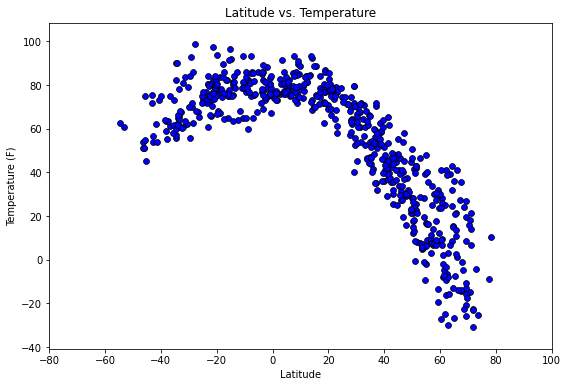

In [38]:
# Increase the size of the figure
plt.figure(figsize=(9,6))

# Plot the lat vs temperature
plt.scatter(x = weather_df['Latitude'], y = weather_df['Temperature'],
            linewidths = 0.75, edgecolors = 'black', color = 'blue', s=35)

# Add labeling
plt.title(f"Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Temperature (F)")

# Modify ticks
plt.xlim(-80,100)
plt.ylim(min(weather_df['Temperature']) - 10, max(weather_df['Temperature']) + 10)

plt.savefig('../Output_Data/Temperature.png')
plt.show()

## Latitude vs. Humidity Plot

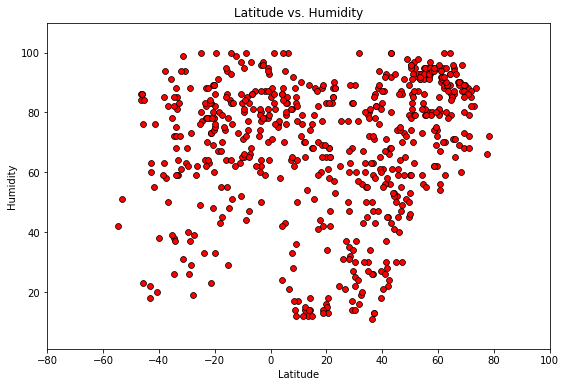

In [39]:
# Increase the size of the figure
plt.figure(figsize=(9,6))

# Plot the lat vs temperature
plt.scatter(x = weather_df['Latitude'], y = weather_df['Humidity'],
            linewidths = 0.75, edgecolors = 'black', color = 'red', s=35)

# Add labeling
plt.title(f"Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Modify ticks
plt.xlim(-80,100)
plt.ylim(min(weather_df['Humidity']) - 10, max(weather_df['Humidity']) + 10)

plt.savefig('../Output_Data/Humidity.png')
plt.show()

## Latitude vs. Cloudiness Plot

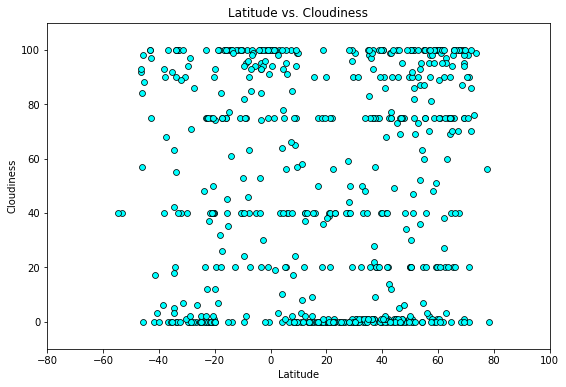

In [40]:
# Increase the size of the figure
plt.figure(figsize=(9,6))

# Plot the lat vs temperature
plt.scatter(x = weather_df['Latitude'], y = weather_df['Cloudiness'],
            linewidths = 0.75, edgecolors = 'black', color = 'cyan', s=35)

# Add labeling
plt.title(f"Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Modify ticks
plt.xlim(-80,100)
plt.ylim(min(weather_df['Cloudiness']) - 10, max(weather_df['Cloudiness']) + 10)

plt.savefig('../Output_Data/Cloudiness.png')
plt.show()

## Latitude vs. Wind Speed Plot

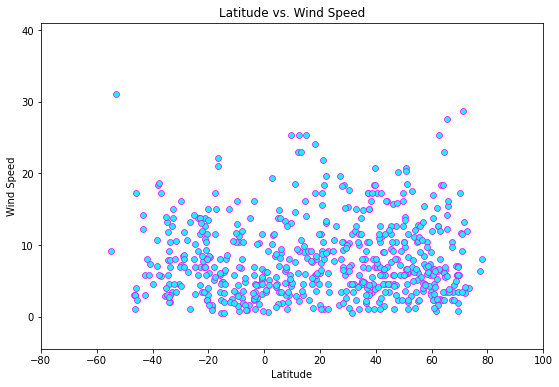

In [41]:
# Increase the size of the figure
plt.figure(figsize=(9,6))

# Plot the lat vs temperature
plt.scatter(x = weather_df['Latitude'], y = weather_df['Wind Speed'],
            linewidths = 0.75, edgecolors = 'magenta', color = 'cyan', s=35)

# Add labeling
plt.title(f"Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Modify ticks
plt.xlim(-80,100)
plt.ylim(min(weather_df['Wind Speed']) - 5, max(weather_df['Wind Speed']) + 10)

plt.savefig('../Output_Data/Wind_Speed.png')
plt.show()

## Linear Regression

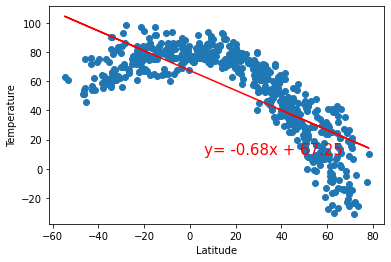

In [52]:
# Add the linear regression equation and line to plot
x_values = weather_df['Latitude']
y_values = weather_df['Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq = f"y= {slope:.2f}x {'+' if intercept > 0 else ''} {intercept:.2f}"
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.savefig('../Output_Data/Linear_Regression.png')
plt.show()

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

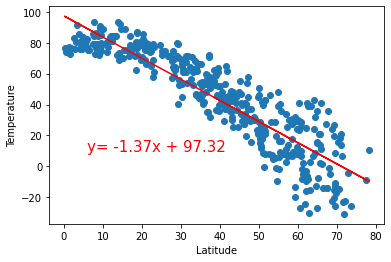

In [53]:
# Add the linear regression equation and line to plot
x_values = northern_hemisphere['Latitude']
y_values = northern_hemisphere['Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq = f"y= {slope:.2f}x {'+' if intercept > 0 else ''} {intercept:.2f}"
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.savefig('../Output_Data/Northern_Temp.png')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

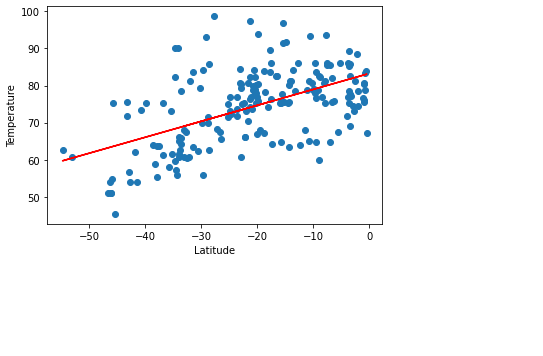

In [54]:
# Add the linear regression equation and line to plot
x_values = southern_hemisphere['Latitude']
y_values = southern_hemisphere['Temperature']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq = f"y= {slope:.2f}x {'+' if intercept > 0 else ''} {intercept:.2f}"
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.savefig('../Output_Data/Southern_Temp.png')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

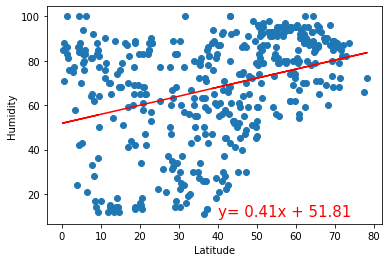

In [55]:
# Add the linear regression equation and line to plot
x_values = northern_hemisphere['Latitude']
y_values = northern_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq = f"y= {slope:.2f}x {'+' if intercept > 0 else ''} {intercept:.2f}"
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(40,10),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.savefig('../Output_Data/Northern_Humidity.png')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

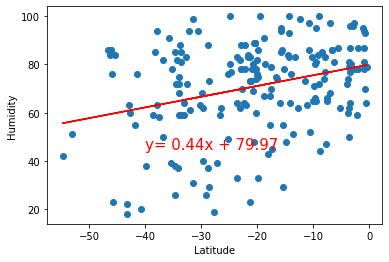

In [56]:
# Add the linear regression equation and line to plot
x_values = southern_hemisphere['Latitude']
y_values = southern_hemisphere['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq = f"y= {slope:.2f}x {'+' if intercept > 0 else ''} {intercept:.2f}"
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-40,45),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.savefig('../Output_Data/Southern_Humidity.png')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression